In [70]:
from funkcije import *

In [2]:
baza_location = biraj_bazu()

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/baza/emodb/wav', filen…

In [ ]:
baza = ucitaj_bazu(baza_location)

## Učitavanje fičera
---

In [25]:
nemci = pd.read_csv("baza_full.csv")

In [30]:
nemci.head()

,filename,kod_govornika,kod_recenice,kod_emocije,naziv_emocije,pol,godiste,hurstovi,duzine,odnos_tišine_i_govora,najduža_priča,zcr_prosek,zcr_mean,zcr_max,zcr_med,zcr_stdev,pitch_prosek,pitch_mean,pitch_max,pitch_med,pitch_stdev,energija_prosek,energija_min,energija_max,energija_stdev,eng_bez_tis,eng_bez_tis_avg,eng_bez_tis_min,eng_bez_tis_max,eng_bez_tis_med,eng_bez_tis_stdev,energija_ukupna,mfccovi_x,mfccovi_y,mfccovi,bes,tuga
0,03a01Fa.wav,3,a01,F,Sreća,M,31,0.057822,0.027695,0.014496,0.016678,0.039627,0.000000,0.041737,0.035844,0.040875,0.034708,0.031669,0.035054,0.034017,0.042673,0.017427,0.044139,0.032203,0.011907,0.025037,0.014647,0.002583,0.032203,0.007222,0.023040,0.009818,20,82,-573.01196;-582.12134;-586.8176;-584.4865;-338...,0.0,0.0
1,03a01Nc.wav,3,a01,N,Neutralno,M,31,0.051544,0.023508,0.012098,0.013819,0.027523,0.000000,0.034284,0.022568,0.032566,0.025073,0.027890,0.022468,0.027078,0.026987,0.042682,0.042051,0.043451,0.036026,0.042954,0.033954,0.000579,0.043451,0.009349,0.040164,0.019309,20,70,-544.9087;-524.06104;-542.695;-466.05853;-281....,0.0,0.0
2,03a01Wa.wav,3,a01,W,Bes,M,31,0.051150,0.027396,0.014676,0.016917,0.050864,0.100504,0.038425,0.063722,0.038340,0.039823,0.047725,0.032331,0.041398,0.028820,0.041732,0.042269,0.045070,0.024851,0.044305,0.035076,0.000232,0.045070,0.017133,0.041947,0.023258,20,81,-545.2024;-542.0179;-541.4934;-541.7991;-532.3...,1.0,0.0
3,03a02Fc.wav,3,a02,F,Sreća,M,31,0.048770,0.029270,0.015113,0.033119,0.042765,0.000000,0.046209,0.043809,0.040676,0.049342,0.045570,0.049004,0.046737,0.051125,0.039837,0.048514,0.055141,0.027702,0.043035,0.033512,0.002959,0.055141,0.015307,0.040674,0.023722,20,87,-462.67767;-450.47595;-474.7913;-311.72556;-17...,0.0,0.0
4,03a02Nc.wav,3,a02,N,Neutralno,M,31,0.047226,0.021006,0.019172,0.027877,0.027608,0.000000,0.036437,0.023896,0.032225,0.023681,0.028542,0.019003,0.025484,0.018476,0.057703,0.042335,0.052075,0.034992,0.058653,0.052259,0.007179,0.052075,0.018944,0.057258,0.026543,20,63,-544.0373;-531.3774;-527.38007;-405.45212;-268...,0.0,0.0


### Dodavanje tuge i besa
---

In [137]:
nemci["bes"] = (nemci["kod_emocije"] == "W") * 1.0
nemci["tuga"] = (nemci["kod_emocije"] == "T") * 1.0
nemci["nista"] = (nemci["tuga"] != 1) * 1.0
nemci["nista"] = (nemci["bes"] != 1) * 1.0 * nemci["nista"]
nemci

,filename,kod_govornika,kod_recenice,kod_emocije,naziv_emocije,pol,godiste,hurstovi,duzine,odnos_tišine_i_govora,najduža_priča,zcr_prosek,zcr_mean,zcr_max,zcr_med,zcr_stdev,pitch_prosek,pitch_mean,pitch_max,pitch_med,pitch_stdev,energija_prosek,energija_min,energija_max,energija_stdev,eng_bez_tis,eng_bez_tis_avg,eng_bez_tis_min,eng_bez_tis_max,eng_bez_tis_med,eng_bez_tis_stdev,energija_ukupna,mfccovi_x,mfccovi_y,mfccovi,bes,tuga,nista
0,03a01Fa.wav,3,a01,F,Sreća,M,31,0.057822,0.027695,0.014496,0.016678,0.039627,0.000000,0.041737,0.035844,0.040875,0.034708,0.031669,0.035054,0.034017,0.042673,0.017427,0.044139,0.032203,0.011907,0.025037,0.014647,0.002583,0.032203,0.007222,0.023040,0.009818,20,82,-573.01196;-582.12134;-586.8176;-584.4865;-338...,0.0,0.0,1.0
1,03a01Nc.wav,3,a01,N,Neutralno,M,31,0.051544,0.023508,0.012098,0.013819,0.027523,0.000000,0.034284,0.022568,0.032566,0.025073,0.027890,0.022468,0.027078,0.026987,0.042682,0.042051,0.043451,0.036026,0.042954,0.033954,0.000579,0.043451,0.009349,0.040164,0.019309,20,70,-544.9087;-524.06104;-542.695;-466.05853;-281....,0.0,0.0,1.0
2,03a01Wa.wav,3,a01,W,Bes,M,31,0.051150,0.027396,0.014676,0.016917,0.050864,0.100504,0.038425,0.063722,0.038340,0.039823,0.047725,0.032331,0.041398,0.028820,0.041732,0.042269,0.045070,0.024851,0.044305,0.035076,0.000232,0.045070,0.017133,0.041947,0.023258,20,81,-545.2024;-542.0179;-541.4934;-541.7991;-532.3...,1.0,0.0,0.0
3,03a02Fc.wav,3,a02,F,Sreća,M,31,0.048770,0.029270,0.015113,0.033119,0.042765,0.000000,0.046209,0.043809,0.040676,0.049342,0.045570,0.049004,0.046737,0.051125,0.039837,0.048514,0.055141,0.027702,0.043035,0.033512,0.002959,0.055141,0.015307,0.040674,0.023722,20,87,-462.67767;-450.47595;-474.7913;-311.72556;-17...,0.0,0.0,1.0
4,03a02Nc.wav,3,a02,N,Neutralno,M,31,0.047226,0.021006,0.019172,0.027877,0.027608,0.000000,0.036437,0.023896,0.032225,0.023681,0.028542,0.019003,0.025484,0.018476,0.057703,0.042335,0.052075,0.034992,0.058653,0.052259,0.007179,0.052075,0.018944,0.057258,0.026543,20,63,-544.0373;-531.3774;-527.38007;-405.45212;-268...,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,16b10Lb.wav,16,b10,L,Dosada,F,31,0.049579,0.050227,0.034127,0.047772,0.037308,0.075378,0.043890,0.033189,0.039550,0.036696,0.042519,0.040970,0.032669,0.040968,0.034995,0.044069,0.039598,0.016916,0.040155,0.035540,0.002804,0.039598,0.017168,0.040335,0.043180,20,149,-463.54443;-465.73322;-494.0283;-500.79193;-46...,0.0,0.0,1.0
531,16b10Tb.wav,16,b10,T,Tuga,F,31,0.037642,0.051072,0.018778,0.060281,0.038834,0.000000,0.051343,0.029206,0.044661,0.041108,0.057747,0.038671,0.040220,0.017127,0.078883,0.042005,0.044063,0.058161,0.069282,0.071198,0.047161,0.044063,0.032171,0.068801,0.087927,20,151,-445.80164;-435.16284;-438.70038;-427.3457;-19...,0.0,1.0,0.0
532,16b10Td.wav,16,b10,T,Tuga,F,31,0.048029,0.057398,0.016357,0.058732,0.030288,0.000000,0.047203,0.018586,0.039758,0.033811,0.047177,0.026413,0.033626,0.012115,0.035342,0.042027,0.032165,0.033624,0.035049,0.030735,0.038350,0.032165,0.015337,0.033847,0.042653,20,170,-444.67496;-447.99628;-452.18787;-215.87308;-1...,0.0,1.0,0.0
533,16b10Wa.wav,16,b10,W,Bes,F,31,0.031072,0.035221,0.013295,0.042292,0.062608,0.175882,0.038756,0.086290,0.035835,0.058613,0.046367,0.063184,0.060262,0.071997,0.008845,0.042101,0.014207,0.003565,0.013078,0.007176,0.000096,0.014207,0.002408,0.011827,0.006113,20,104,-613.46625;-595.7472;-595.0384;-627.9332;-568....,1.0,0.0,0.0


### matrica korelacije za tugu

In [31]:
corr_matrix =  nemci.drop(["kod_emocije", "kod_recenice", "filename", "naziv_emocije", "pol", "godiste", "kod_govornika", "mfccovi", "mfccovi_x", "mfccovi_y"], axis=1).corr()

In [32]:
# corr_matrix
corr_matrix["bes"]


hurstovi                 0.030572
duzine                  -0.075397
odnos_tišine_i_govora   -0.201631
najduža_priča           -0.213701
zcr_prosek               0.496547
zcr_mean                 0.246537
zcr_max                  0.028780
zcr_med                  0.644322
zcr_stdev               -0.054540
pitch_prosek             0.428876
pitch_mean               0.093511
pitch_max                0.361372
pitch_med                0.436337
pitch_stdev              0.329180
energija_prosek         -0.321033
energija_min            -0.067796
energija_max            -0.152524
energija_stdev          -0.368610
eng_bez_tis             -0.200517
eng_bez_tis_avg         -0.332888
eng_bez_tis_min         -0.165875
eng_bez_tis_max         -0.152524
eng_bez_tis_med         -0.338572
eng_bez_tis_stdev       -0.228723
energija_ukupna         -0.316235
bes                      1.000000
tuga                    -0.201993
Name: bes, dtype: float64

In [202]:
X = nemci.drop(["kod_emocije", "kod_recenice", "filename", "naziv_emocije", "pol", "godiste", "kod_govornika","bes", "tuga"], axis=1)

X = nemci[["hurstovi", "duzine",
            "odnos_tišine_i_govora", "najduža_priča",	"zcr_prosek",
            "zcr_mean",	"zcr_max",	"zcr_med",	"zcr_stdev",	"pitch_prosek",
            "pitch_mean",	"pitch_max",	"pitch_med",	"pitch_stdev",	"energija_prosek",	"energija_min",
            "energija_max",	"energija_stdev", "eng_bez_tis",	"eng_bez_tis_avg",	"eng_bez_tis_min",
            "eng_bez_tis_max",	"eng_bez_tis_med",	"eng_bez_tis_stdev",	"energija_ukupna"]]

# y = nemci[["tuga", "bes", "nista"]]
y = nemci[["bes", "nista"]]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=12345
)

X = X.values
y = y.values

In [204]:
X_train


,hurstovi,duzine,odnos_tišine_i_govora,najduža_priča,zcr_prosek,zcr_mean,zcr_max,zcr_med,zcr_stdev,pitch_prosek,pitch_mean,pitch_max,pitch_med,pitch_stdev,energija_prosek,energija_min,energija_max,energija_stdev,eng_bez_tis,eng_bez_tis_avg,eng_bez_tis_min,eng_bez_tis_max,eng_bez_tis_med,eng_bez_tis_stdev,energija_ukupna
403,0.039111,0.053672,0.020202,0.062902,0.030929,0.0,0.048362,0.023896,0.046533,0.038094,0.042030,0.031229,0.038850,0.020756,0.043776,0.042392,0.040223,0.054003,0.035230,0.040201,0.001255,0.040223,0.037385,0.035598,0.052187
17,0.043683,0.051031,0.018322,0.036574,0.035990,0.0,0.038425,0.018586,0.043677,0.021013,0.029549,0.016639,0.020819,0.009254,0.036608,0.042077,0.032597,0.035583,0.035309,0.032871,0.003959,0.032597,0.015859,0.034577,0.040568
461,0.034081,0.032291,0.063103,0.069216,0.022677,0.0,0.044387,0.017258,0.033169,0.018506,0.021506,0.016072,0.018229,0.013154,0.042246,0.042292,0.033858,0.051926,0.036029,0.046275,0.000453,0.033858,0.061845,0.037579,0.036162
486,0.041188,0.080078,0.013503,0.055158,0.054657,0.0,0.045381,0.047792,0.050266,0.074652,0.062251,0.251282,0.047417,0.358904,0.019557,0.043285,0.031920,0.019134,0.022790,0.015919,0.000212,0.031920,0.007752,0.021092,0.030825
164,0.041659,0.048641,0.050228,0.092804,0.030799,0.0,0.037265,0.014603,0.035943,0.018229,0.022654,0.013831,0.018335,0.005654,0.069239,0.043372,0.047807,0.088301,0.056381,0.074066,0.017892,0.047807,0.102311,0.058736,0.087144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.027646,0.026694,0.034509,0.055754,0.046396,0.0,0.040743,0.045136,0.042930,0.031445,0.029209,0.025513,0.033240,0.025184,0.037141,0.043779,0.032623,0.046647,0.029012,0.037561,0.012224,0.032623,0.054136,0.030040,0.024245
129,0.037662,0.033837,0.022137,0.033953,0.040838,0.0,0.039418,0.035844,0.043291,0.048598,0.048841,0.046791,0.048807,0.037244,0.030099,0.043186,0.022627,0.029877,0.026840,0.027943,0.000177,0.022627,0.025387,0.026809,0.022864
285,0.049121,0.021350,0.023490,0.021205,0.041399,0.0,0.045050,0.026551,0.048952,0.039034,0.056755,0.031229,0.037527,0.017487,0.036429,0.042219,0.050057,0.022347,0.056430,0.034794,0.002882,0.050057,0.020657,0.054555,0.017978
485,0.029738,0.042328,0.023987,0.042054,0.063878,0.0,0.044553,0.069032,0.049123,0.063970,0.072338,0.052219,0.063477,0.035426,0.036420,0.042479,0.031786,0.044304,0.032655,0.034728,0.000567,0.031786,0.039111,0.032836,0.035554


In [205]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [206]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [207]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 403 to 482
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hurstovi               428 non-null    float64
 1   duzine                 428 non-null    float64
 2   odnos_tišine_i_govora  428 non-null    float64
 3   najduža_priča          428 non-null    float64
 4   zcr_prosek             428 non-null    float64
 5   zcr_mean               428 non-null    float64
 6   zcr_max                428 non-null    float64
 7   zcr_med                428 non-null    float64
 8   zcr_stdev              428 non-null    float64
 9   pitch_prosek           428 non-null    float64
 10  pitch_mean             428 non-null    float64
 11  pitch_max              428 non-null    float64
 12  pitch_med              428 non-null    float64
 13  pitch_stdev            428 non-null    float64
 14  energija_prosek        428 non-null    float64
 15  energija_

In [208]:
train_preds = knn_model.predict(X_train)



mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.24275589746256537

In [209]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.3860226670556913

In [210]:
print(test_preds)
print(y_test)

[[0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.         1.        ]
 [0.         0.66666667]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         0.66666667]


In [211]:
X_test

,hurstovi,duzine,odnos_tišine_i_govora,najduža_priča,zcr_prosek,zcr_mean,zcr_max,zcr_med,zcr_stdev,pitch_prosek,pitch_mean,pitch_max,pitch_med,pitch_stdev,energija_prosek,energija_min,energija_max,energija_stdev,eng_bez_tis,eng_bez_tis_avg,eng_bez_tis_min,eng_bez_tis_max,eng_bez_tis_med,eng_bez_tis_stdev,energija_ukupna
56,0.037058,0.024603,0.013366,0.021086,0.048881,0.000000,0.043559,0.045136,0.047237,0.048091,0.053570,0.042171,0.048386,0.040463,0.017078,0.043740,0.039908,0.012116,0.029991,0.013922,1.432035e-03,0.039908,0.006108,0.026912,0.008285
483,0.036651,0.037377,0.010257,0.020014,0.074401,0.000000,0.048031,0.101557,0.042959,0.066899,0.043013,0.068506,0.068428,0.084603,0.013616,0.042720,0.022550,0.003099,0.020724,0.010109,1.975309e-04,0.022550,0.001448,0.018000,0.009136
291,0.049578,0.024350,0.018477,0.016440,0.046735,0.150756,0.039418,0.059739,0.037299,0.056656,0.054506,0.049004,0.056880,0.046083,0.024836,0.042958,0.036874,0.017530,0.034470,0.022358,1.469979e-07,0.036874,0.008561,0.032712,0.013180
281,0.041833,0.027442,0.019622,0.037050,0.048222,0.000000,0.048197,0.043809,0.052905,0.070346,0.061181,0.070514,0.070027,0.073213,0.049959,0.044014,0.045579,0.027668,0.056910,0.045237,2.499136e-14,0.045579,0.021851,0.054941,0.030032
241,0.050736,0.056746,0.038490,0.052656,0.023120,0.000000,0.042731,0.009293,0.040903,0.020607,0.026631,0.015796,0.020819,0.006322,0.046736,0.042225,0.033985,0.048545,0.042278,0.048808,4.643821e-03,0.033985,0.033463,0.043477,0.066991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.041775,0.044692,0.037570,0.044079,0.030511,0.000000,0.046209,0.019913,0.044574,0.034020,0.045047,0.028309,0.033723,0.014952,0.038791,0.042024,0.034991,0.041164,0.036508,0.040220,8.072773e-03,0.034991,0.038298,0.037367,0.043462
85,0.040393,0.050447,0.030113,0.029664,0.028439,0.000000,0.035278,0.023896,0.034222,0.035471,0.022394,0.042171,0.035013,0.041327,0.022829,0.042084,0.032413,0.023601,0.024764,0.022813,1.504702e-02,0.032413,0.020867,0.024822,0.027827
334,0.036432,0.031493,0.036545,0.057302,0.032100,0.000000,0.045878,0.027878,0.032004,0.059639,0.051151,0.055005,0.065527,0.066259,0.033011,0.042651,0.036709,0.038311,0.033366,0.033841,4.380343e-03,0.036709,0.043524,0.033877,0.025768
396,0.040509,0.061912,0.013034,0.028234,0.038792,0.000000,0.049356,0.026551,0.051861,0.040624,0.047451,0.031775,0.040805,0.018999,0.026464,0.042456,0.041559,0.021023,0.031542,0.021326,1.421572e-04,0.041559,0.008596,0.029009,0.031932


ValueError: x and y must be the same size

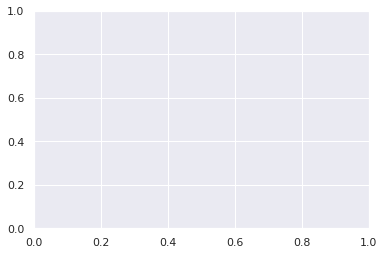

In [212]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test["duzine"], y_test[:], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


In [213]:
test_p = (test_preds[:] == True) * 1.0
print(accuracy_score(y_test, test_p))    

0.48598130841121495


In [214]:
train_p = (train_preds[:] == True) * 1.0
print(accuracy_score(y_train, train_p))

0.7289719626168224


In [215]:
sum(y_test["bes"]  == 1)


22

In [216]:
metrics.confusion_matrix(y_test.values.argmax(axis=1), test_p.argmax(axis=1))

array([[31,  5],
       [30, 41]])